
#**미세먼지와 날씨 데이터 분석 및 시각화**

*    **한글 폰트 설정**
*    **구글드라이브 연동**
*    **미세먼지 데이터 가공**
  1.   패키지 설치 및 로드
  2.   미세먼지 데이터셋 불러오기
  3.   미세먼지 데이터셋 살펴보기
  4.   미세먼지 데이터셋 가공하기
  5.   미세먼지 데이터셋 확인하기

*    **미세먼지 데이터 시각화**
  1.   지역의 미세먼지 농도 산점도
  2.   연도별 미세먼지 월평균이 제일 높은 지역의 월(Month) 개수
  3.   2020년 전국 미세먼지 연평균
  4.   인천의 미세먼지 연평균 변화량
  5.   지역의 월별 미세먼지 평균
*    **공공데이터 날씨 API 사용**
  1.   패키지 설치 및 로드
  2.   날씨 API 사용하여 데이터셋 불러오기
  3.   불러온 데이터셋 살펴보기
  4.   불러온 데이터셋 가공하기
  5.   csv파일로 저장하기
*    **일별 날씨 데이터 가공**
  1.   일별 날씨 데이터셋 불러오기
  2.   일별 날씨 데이터셋 살펴보기
  3.   일별 날씨 데이터셋 가공하기
  4.   데이터셋 부족한 지점 삭제하기
  5.   일별 날씨 데이터셋 통계정보 확인하기
*    **월별 날씨 데이터로 가공**
  1.   월별 날씨 데이터셋 생성하기
  2.   weather_df 변경하기
  3.   월별 날씨 데이터셋 살펴보기
  4.   월별 날씨 데이터셋 통계정보 확인하기
*    **2020년 최다풍향 시각화**
  1.   16방위 정보를 담는 리스트 선언
  2.   2020년 최다풍향 시각화
  3.   2020년 계절별 최다풍향 시각화
*    **날씨 데이터 프레임에 "PM10" 열 추가하기**
  1.   미세먼지 데이터와 날씨 데이터 이용해서 추가하기
  2.   날씨 데이터셋 살펴보기
*    **미세먼지와 날씨의 상관계수**
  1.   히트맵 그리기
  2.   히트맵 분석
*    **미세먼지와 날씨 시각화**
  1.   풍향별 미세먼지 농도
<br><br>
---

---
# **한글 폰트 설정**

In [1]:
#  폰트 설치
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [ ]:
#런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
#  폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

---

---
# **구글드라이브 연동**

In [2]:
# 구글드라이브 연동
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


---

---
# **미세먼지 데이터 가공**

####**1. 패키지 설치 및 로드**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
start_year = 2010
end_year = 2020 # 2021년까지 존재하지만 11월, 12월 데이터 부재로 인한 제외
df_dic = dict() # keys : 각 연도  values : 각 연도에 해당하는 csv파일의 DataFrame

---


####**2. 미세먼지 데이터셋 불러오기**


*   KOSIS 국가통계포털 : https://kosis.kr/statHtml/statHtml.do?orgId=106&tblId=DT_106N_03_0200076&vw_cd=MT_ZTITLE&list_id=T_7&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

In [5]:
# 2010년부터 2020년까지의 csv파일 불러오기 (2021년 csv파일도 존재는 하나 11월, 12월 데이터의 부재로 인해 제외)
for year in range(start_year, end_year + 1):
  df = pd.read_csv(f'/content/drive/MyDrive/PM10_Analysis_Project/Dataset/{year}.csv', encoding='cp949') # cp949는 euc-kr의 확장버전
  df_dic[f'{year}년'] = df

---

####**3. 미세먼지 데이터셋 살펴보기**

In [6]:
# 연도별 미세먼지 데이터 프레임의 요약 정보
for year in df_dic.keys():
  print(f'--------------{year} 데이터 프레임 요약 정보--------------')
  df_dic[year].info()
  print()

--------------2010년 데이터 프레임 요약 정보--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   구분(1)    301 non-null    object
 1   구분(2)    301 non-null    object
 2   구분(3)    301 non-null    object
 3   구분(4)    301 non-null    object
 4   2010.01  301 non-null    object
 5   2010.02  301 non-null    object
 6   2010.03  301 non-null    object
 7   2010.04  301 non-null    object
 8   2010.05  301 non-null    object
 9   2010.06  301 non-null    object
 10  2010.07  301 non-null    object
 11  2010.08  301 non-null    object
 12  2010.09  301 non-null    object
 13  2010.10  301 non-null    object
 14  2010.11  301 non-null    object
 15  2010.12  301 non-null    object
dtypes: object(16)
memory usage: 37.8+ KB

--------------2011년 데이터 프레임 요약 정보--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (tota

In [7]:
# 2010년 미세먼지 데이터 프레임 앞부분 5행
df_dic['2010년'].head() # 5(default) 

,구분(1),구분(2),구분(3),구분(4),2010.01,2010.02,2010.03,2010.04,2010.05,2010.06,2010.07,2010.08,2010.09,2010.10,2010.11,2010.12
0,도시대기,서울,중구,서소문동,58,50,65,51,57,48,30,31,25,40,70,63
1,도시대기,서울,종로구,효제동,59,50,57,49,56,56,42,39,31,44,75,44
2,도시대기,서울,중랑구,면목동,60,48,63,49,55,50,31,32,24,41,75,66
3,도시대기,서울,동대문구,용두동,63,52,65,51,58,53,33,33,27,44,76,68
4,도시대기,서울,은평구,불광동,52,46,60,48,56,48,32,31,23,36,68,62


In [8]:
# 2020년 미세먼지 데이터 프레임 뒷부분 7행
df_dic['2020년'].tail(7)

,구분(1),구분(2),구분(3),구분(4),2020.01,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,2020.09,2020.10,2020.11,2020.12
573,도로변대기,경기,시도평균,소계,49,45,49,47,40,43,25,25,24,40,48,45
574,도로변대기,강원,춘천,온의동,-,-,-,-,35,40,21,20,22,36,48,52
575,도로변대기,충북,청주,복대동,50,48,48,47,35,37,18,26,28,41,45,46
576,도로변대기,충남,천안,성성동,66,58,57,51,44,43,28,25,29,48,52,51
577,도로변대기,전북,전주,서신동,-,-,-,40**,38,44,22,27,26,36,38,38
578,도로변대기,경남,창원,반송로,28,31,29,32,30,28,19,33,23,27,29,28
579,도로변대기,제주,제주,노형로,32,37,44,48,44,31,20,28,30,33,29,27


---

####**4. 미세먼지 데이터셋 가공하기**

**[데이터셋 컬럼명 변경]**

In [9]:
# 함수 정의
def changeColumns(df): # 데이터 프레임의 컬럼명을 변경하는 함수
  df.columns = ['구분1', '구분2', '구분3', '구분4', '1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
  return df

In [10]:
# 데이터 프레임의 컬럼명 변경
for df in df_dic.values(): # key값이 아닌 value로 DataFrame을 바로 추출함
  changeColumns(df) # 컬럼명 변경 함수 호출

In [11]:
# 데이터 프레임 컬럼명 변경 확인
for year in df_dic.keys():
  print(f'{year} 컬럼명')
  print(df_dic[year].columns, '\n')

2010년 컬럼명
Index(['구분1', '구분2', '구분3', '구분4', '1월', '2월', '3월', '4월', '5월', '6월', '7월',
       '8월', '9월', '10월', '11월', '12월'],
      dtype='object') 

2011년 컬럼명
Index(['구분1', '구분2', '구분3', '구분4', '1월', '2월', '3월', '4월', '5월', '6월', '7월',
       '8월', '9월', '10월', '11월', '12월'],
      dtype='object') 

2012년 컬럼명
Index(['구분1', '구분2', '구분3', '구분4', '1월', '2월', '3월', '4월', '5월', '6월', '7월',
       '8월', '9월', '10월', '11월', '12월'],
      dtype='object') 

2013년 컬럼명
Index(['구분1', '구분2', '구분3', '구분4', '1월', '2월', '3월', '4월', '5월', '6월', '7월',
       '8월', '9월', '10월', '11월', '12월'],
      dtype='object') 

2014년 컬럼명
Index(['구분1', '구분2', '구분3', '구분4', '1월', '2월', '3월', '4월', '5월', '6월', '7월',
       '8월', '9월', '10월', '11월', '12월'],
      dtype='object') 

2015년 컬럼명
Index(['구분1', '구분2', '구분3', '구분4', '1월', '2월', '3월', '4월', '5월', '6월', '7월',
       '8월', '9월', '10월', '11월', '12월'],
      dtype='object') 

2016년 컬럼명
Index(['구분1', '구분2', '구분3', '구분4', '1월', '2월', '3월', '4월', '5월', '6월', '7월',
 

**[데이터셋 전처리]**

In [12]:
# 연도별 미세먼지 데이터 프레임의 고유값 보기
# (2010년 ~ 2013년) 2014 10부터 '-' '*'이 나옴
for year in df_dic.keys():
  for col in df_dic[year].columns:
    print(f'{year} col : {col}')
    print(df_dic[year][col].unique(), '\n')

2010년 col : 구분1
['도시대기' '국가배경농도' '교외대기' '도로변대기'] 

2010년 col : 구분2
['서울' '부산' '대구' '인천' '광주' '대전' '울산' '경기' '강원' '충북' '충남' '전북' '전남' '경북'
 '경남' '제주'] 

2010년 col : 구분3
['중구' '종로구' '중랑구' '동대문구' '은평구' '마포구' '영등포구' '동작구' '관악구' '강남구' '금천구' '강동구'
 '강북구' '성북구' '용산구' '광진구' '성동구' '도봉구' '서대문구' '구로구' '서초구' '강서구' '송파구' '양천구'
 '노원구' '남구' '사상구' '북구' '사하구' '부산진구' '연제구' '영도구' '금정구' '해운대구' '기장군' '수영구'
 '동래구' '서구' '동구' '수성구' '달서구' '달성군' '남동구' '부평구' '계양구' '강화군' '연수구' '미추홀구'
 '광산구' '대덕구' '유성구' '울주군' '수원' '안양' '성남' '의정부' '광명' '안산' '평택' '과천' '구리'
 '의왕' '고양' '광주' '군포' '시흥' '부천' '남양주' '용인' '김포' '오산' '하남' '화성' '양주' '동두천'
 '안성' '이천' '파주' '포천' '춘천' '강릉' '원주' '동해' '삼척' '청주' '충주' '제천' '천안' '당진'
 '서산' '아산' '전주' '군산' '익산' '남원' '정읍' '고창' '여수' '광양' '순천' '목포' '영암' '포항'
 '구미' '김천' '경주' '안동' '영주' '창원' '진주' '하동' '김해' '양산' '제주' '서귀포' '울릉군' '북제주'
 '옹진군' '양구' '고성' '정선' '횡성' '괴산' '태안' '공주' '임실' '화순' '영덕' '영천' '의성' '거제'
 '거창' '서울' '부산' '대구' '인천' '대전' '울산' '시도평균'] 

2010년 col : 구분4
['서소문동' '효제동' '면목동' '용두동' '불광동' '대흥동' '당산동' '

In [13]:
# 데이터상 별표(*) 없애는 함수
def delStar(data):
  if (len(data) > 2):
    return data.replace('*', '')
  else:
    return data

In [14]:
# 별표(*) 제거
for df in df_dic.values():
  for month in range(1, 13):
    df[f'{month}월'] = df[f'{month}월'].astype(str) # 열의 데이터가 전부 정수일 경우 그 열은 타입이 int로 되어서 표준화? 정규화?를 위해 str타입으로 전부 변경
                                                    # object로 변경시 int형의 len을 할 수 없음
    df[f'{month}월'] = df.apply(lambda x: delStar(x[f'{month}월']), axis = 1) # 람다식을 이용한 별표(*) 없애기

In [15]:
# '-' 표준화
for df in df_dic.values():
  for month in range(1, 13):
    df.replace('-', np.nan, inplace = True) # 결측치 표준화
    df.loc[:, '1월':'12월'] = df.loc[:, '1월':'12월'].astype(float) # 1월부터 12월의 열 타입을 float으로 변경 (mean()을 위해) 그리고 NaN은 float형

In [16]:
# 데이터상 누락 데이터 표준화 및 별표(*) 제거 확인
for year in df_dic.keys():
  for col in df_dic[year].columns:
    print(f'{year} col : {col}')
    print(df_dic[year][col].unique(), '\n')

2010년 col : 구분1
['도시대기' '국가배경농도' '교외대기' '도로변대기'] 

2010년 col : 구분2
['서울' '부산' '대구' '인천' '광주' '대전' '울산' '경기' '강원' '충북' '충남' '전북' '전남' '경북'
 '경남' '제주'] 

2010년 col : 구분3
['중구' '종로구' '중랑구' '동대문구' '은평구' '마포구' '영등포구' '동작구' '관악구' '강남구' '금천구' '강동구'
 '강북구' '성북구' '용산구' '광진구' '성동구' '도봉구' '서대문구' '구로구' '서초구' '강서구' '송파구' '양천구'
 '노원구' '남구' '사상구' '북구' '사하구' '부산진구' '연제구' '영도구' '금정구' '해운대구' '기장군' '수영구'
 '동래구' '서구' '동구' '수성구' '달서구' '달성군' '남동구' '부평구' '계양구' '강화군' '연수구' '미추홀구'
 '광산구' '대덕구' '유성구' '울주군' '수원' '안양' '성남' '의정부' '광명' '안산' '평택' '과천' '구리'
 '의왕' '고양' '광주' '군포' '시흥' '부천' '남양주' '용인' '김포' '오산' '하남' '화성' '양주' '동두천'
 '안성' '이천' '파주' '포천' '춘천' '강릉' '원주' '동해' '삼척' '청주' '충주' '제천' '천안' '당진'
 '서산' '아산' '전주' '군산' '익산' '남원' '정읍' '고창' '여수' '광양' '순천' '목포' '영암' '포항'
 '구미' '김천' '경주' '안동' '영주' '창원' '진주' '하동' '김해' '양산' '제주' '서귀포' '울릉군' '북제주'
 '옹진군' '양구' '고성' '정선' '횡성' '괴산' '태안' '공주' '임실' '화순' '영덕' '영천' '의성' '거제'
 '거창' '서울' '부산' '대구' '인천' '대전' '울산' '시도평균'] 

2010년 col : 구분4
['서소문동' '효제동' '면목동' '용두동' '불광동' '대흥동' '당산동' '

---

####**5. 미세먼지 통계정보 확인하기**

In [17]:
# 미세먼지 데이터 프레임의 1월부터 12월 통계정보
for year in df_dic.keys():
  print(f'-----------------------------{year} 데이터 프레임 통계정보-----------------------------')
  print(df_dic[year].loc[:,'1월':'12월'].describe(), '\n')

-----------------------------2010년 데이터 프레임 통계정보-----------------------------
               1월          2월          3월          4월          5월          6월  \
count  295.000000  297.000000  297.000000  297.000000  297.000000  296.000000   
mean    57.596610   49.558923   64.299663   51.080808   58.865320   51.689189   
std     13.296334   10.026185    9.387731    9.281277    9.585077   12.109865   
min     29.000000   25.000000   43.000000   21.000000   22.000000   17.000000   
25%     47.000000   43.000000   58.000000   44.000000   52.000000   43.000000   
50%     57.000000   49.000000   65.000000   52.000000   58.000000   51.000000   
75%     65.000000   56.000000   70.000000   56.000000   65.000000   58.250000   
max    111.000000   86.000000  102.000000   78.000000   90.000000   95.000000   

               7월          8월          9월         10월         11월         12월  
count  293.000000  297.000000  291.000000  298.000000  298.000000  298.000000  
mean    36.156997   36.205387   3

---

---
# **미세먼지 데이터 시각화**

####**1. 지역의 미세먼지 농도 산점도**

**[데이터 프레임 생성]**

In [18]:
# concat을 이용한 2010년 ~ 2020년 미세먼지 데이터 연결
all_df = pd.DataFrame()

for year in df_dic.keys():
  all_df = pd.concat([all_df, df_dic[year]], ignore_index = True) # axis = 0 (default)

all_df = all_df[all_df['구분1'] == '도시대기']
all_df.set_index('구분2', inplace = True)

all_df

,구분1,구분3,구분4,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
구분2,,,,,,,,,,,,,,,
서울,도시대기,중구,서소문동,58.0,50.0,65.0,51.0,57.0,48.0,30.0,31.0,25.0,40.0,70.0,63.0
서울,도시대기,종로구,효제동,59.0,50.0,57.0,49.0,56.0,56.0,42.0,39.0,31.0,44.0,75.0,44.0
서울,도시대기,중랑구,면목동,60.0,48.0,63.0,49.0,55.0,50.0,31.0,32.0,24.0,41.0,75.0,66.0
서울,도시대기,동대문구,용두동,63.0,52.0,65.0,51.0,58.0,53.0,33.0,33.0,27.0,44.0,76.0,68.0
서울,도시대기,은평구,불광동,52.0,46.0,60.0,48.0,56.0,48.0,32.0,31.0,23.0,36.0,68.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
제주,도시대기,제주,연동,35.0,39.0,40.0,45.0,38.0,28.0,20.0,24.0,28.0,33.0,31.0,29.0
제주,도시대기,서귀포,동홍동,26.0,30.0,31.0,41.0,35.0,25.0,19.0,31.0,25.0,29.0,27.0,21.0
제주,도시대기,서귀포,성산읍,30.0,33.0,33.0,39.0,34.0,27.0,16.0,29.0,25.0,29.0,26.0,20.0


In [19]:
# all_df 데이터 종합
my_df = pd.DataFrame()

for month in all_df.columns[3:]:
  my_df = pd.concat([my_df, all_df[month]])

my_df.rename(columns = {0 : 'PM10'}, inplace = True)
my_df

,PM10
서울,58.0
서울,59.0
서울,60.0
서울,63.0
서울,52.0
...,...
제주,29.0
제주,21.0
제주,20.0
제주,25.0


**[데이터 시각화]**

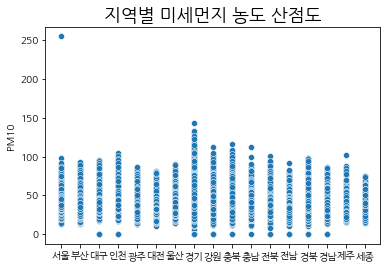

In [20]:
# 그래프 그리기
sns.scatterplot(x = my_df.index, y = my_df['PM10'])
plt.title('지역별 미세먼지 농도 산점도', fontsize = 18)
plt.show()

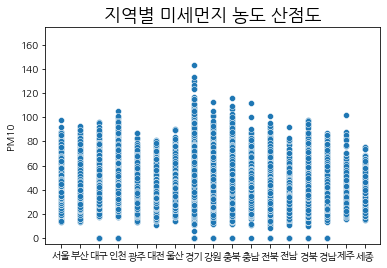

In [21]:
# y범위 설정 후 그래프 그리기
sns.scatterplot(x = my_df.index, y = my_df['PM10'])
plt.title('지역별 미세먼지 농도 산점도', fontsize = 18)
plt.ylim(-5, my_df['PM10'].max() - 80) # y범위 설정
plt.show()

---

####**2. 연도별 미세먼지 월평균이 제일 높은 지역의 월(Month) 개수**

**[데이터 프레임 생성]**

In [22]:
# 2010년부터 2020년까지 지역마다 미세먼지 월평균이 제일 높은 월 구하기
my_df = pd.DataFrame(index = df_dic.keys())

for year in df_dic.keys():
  grouped = df_dic[year].groupby(['구분1'])

  for area in grouped.get_group('도시대기')['구분2'].unique():
    my_df.loc[year, area] = grouped.get_group('도시대기') \
                            .loc[grouped.get_group('도시대기')['구분2'] == area, '1월' : '12월'] \
                            .mean().sort_values(ascending = False).index[0]
    
my_df

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주,세종
2010년,11월,3월,11월,11월,11월,11월,11월,11월,3월,11월,11월,11월,3월,11월,3월,11월,NaN
2011년,5월,5월,5월,5월,5월,5월,5월,2월,2월,2월,5월,5월,5월,5월,5월,5월,NaN
2012년,1월,5월,1월,5월,5월,5월,5월,1월,1월,1월,5월,5월,5월,1월,5월,5월,NaN
2013년,1월,3월,1월,1월,3월,1월,3월,1월,1월,1월,5월,1월,3월,3월,3월,3월,NaN
2014년,5월,5월,1월,5월,5월,5월,5월,5월,3월,1월,5월,5월,5월,5월,5월,5월,NaN
2015년,2월,2월,2월,2월,3월,3월,2월,2월,2월,2월,2월,3월,2월,2월,2월,2월,NaN
2016년,4월,4월,4월,4월,4월,4월,4월,4월,4월,3월,4월,4월,4월,4월,4월,4월,4월
2017년,5월,5월,5월,5월,5월,5월,5월,3월,5월,3월,5월,5월,5월,5월,5월,4월,5월
2018년,2월,4월,4월,11월,11월,11월,4월,11월,4월,11월,11월,11월,4월,4월,4월,4월,11월
2019년,3월,3월,1월,3월,3월,3월,5월,1월,3월,1월,3월,3월,3월,1월,2월,3월,3월


In [23]:
# 지역별 월의 개수 종합
count_df = pd.DataFrame(index = df_dic['2020년'].columns[4:]) # 1월부터 12월을 인덱스로 사용하기 위해 데이터 프레임의 컬럼명을 가져온다.

for area in my_df.columns:
  count_df = pd.concat([count_df,  my_df[area].value_counts()], axis = 1)

count_df.fillna(0, inplace = True)
count_df = count_df.astype(int)
count_df['합계'] = count_df.sum(axis = 1) # 합계 컬럼 생성

count_df

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주,세종,합계
1월,2,0,4,2,0,2,0,3,2,5,0,1,0,2,0,0,0,23
2월,2,1,1,1,0,0,1,2,2,2,1,0,1,1,2,1,0,18
3월,2,3,0,1,3,2,1,2,3,2,2,3,3,1,2,2,2,34
4월,1,3,2,1,2,1,3,1,3,0,1,1,3,3,3,4,1,33
5월,3,4,2,4,4,4,5,1,1,0,5,4,4,3,4,3,1,52
6월,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7월,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8월,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9월,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10월,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**[데이터 시각화]**

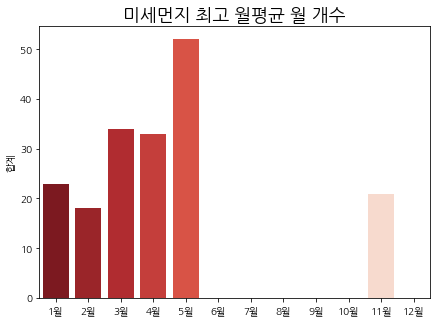

In [24]:
# 그래프 그리기
plt.figure(figsize=(7, 5))
sns.barplot(x = count_df.index, y = count_df['합계'], palette = 'Reds_r')
plt.title('미세먼지 최고 월평균 월 개수', fontsize = 18)
plt.show()

---

####**3. 2020년 전국 미세먼지 연평균**

**[데이터 프레임 생성]**

In [25]:
# 2020년 각 지역의 연 평균 구하기
grouped = df_dic['2020년'].groupby(['구분1'])

my_df = pd.DataFrame(index = grouped.get_group('도시대기')['구분2'].unique())

for area in my_df.index:
  my_df.loc[area, '미세먼지 합'] = grouped.get_group('도시대기')[grouped.get_group('도시대기')['구분2'] == area].sum()['1월':'12월'].sum()
  my_df.loc[area, '데이터 개수'] = grouped.get_group('도시대기')[grouped.get_group('도시대기')['구분2'] == area].count()['1월':'12월'].sum()
  my_df.loc[area, '평균'] = round(my_df.loc[area, '미세먼지 합'] / my_df.loc[area, '데이터 개수'], 2)

my_df.sort_values(by = '평균', ascending = False, inplace = True)

my_df

,미세먼지 합,데이터 개수,평균
경기,44313.0,1163.0,38.10
충남,14049.0,381.0,36.87
세종,1717.0,48.0,35.77
서울,10600.0,300.0,35.33
충북,10201.0,297.0,34.35
대구,5837.0,176.0,33.16
인천,8091.0,245.0,33.02
대전,3948.0,121.0,32.63
전북,10488.0,328.0,31.98
경북,13466.0,437.0,30.81


**[데이터 시각화]**

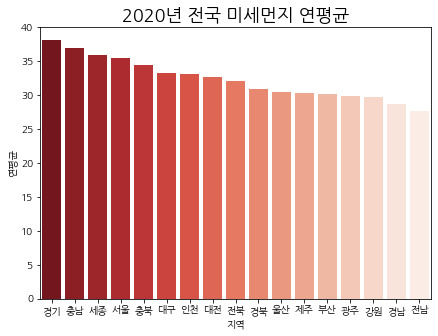

In [26]:
# 그래프 그리기
plt.figure(figsize=(7, 5)) # 사이즈 설정
sns.barplot(x = my_df.index, y = my_df['평균'], palette = 'Reds_r')
plt.xlabel('지역')
plt.ylabel('연평균')
plt.title('2020년 전국 미세먼지 연평균', fontsize = 18)
plt.show()

---

####**4. 인천의 미세먼지 연평균 변화량**

**[데이터 프레임 생성]**

In [27]:
# 인천의 미세먼지 연평균 구하기
my_df = pd.DataFrame(index = df_dic.keys())

for year in df_dic.keys():
  grouped = df_dic[year].groupby(['구분1', '구분2'])
  my_df.loc[year, '미세먼지 합'] = grouped.get_group(('도시대기', '인천')).sum()['1월':'12월'].sum()
  my_df.loc[year, '데이터 개수'] = grouped.get_group(('도시대기', '인천')).count()['1월':'12월'].sum()
  my_df.loc[year, '연평균'] = round(my_df.loc[year, '미세먼지 합'] / my_df.loc[year, '데이터 개수'], 2)

my_df.reset_index(inplace = True) # 행 인덱스 초기화
my_df.rename(columns = {'index' : '연도'}, inplace = True)

my_df

,연도,미세먼지 합,데이터 개수,연평균
0,2010년,9985.0,180.0,55.47
1,2011년,9820.0,179.0,54.86
2,2012년,8517.0,180.0,47.32
3,2013년,8842.0,180.0,49.12
4,2014년,8703.0,178.0,48.89
5,2015년,8954.0,173.0,51.76
6,2016년,8904.0,180.0,49.47
7,2017년,8109.0,178.0,45.56
8,2018년,7863.0,199.0,39.51
9,2019년,8855.0,208.0,42.57


**[데이터 시각화]**

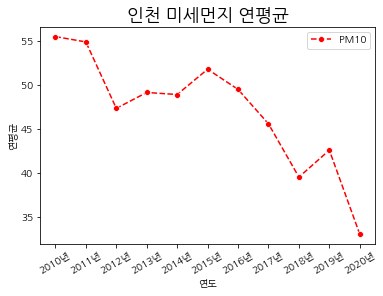

In [28]:
# 그래프 그리기
sns.lineplot(data = my_df, x = '연도' , y = '연평균', marker = 'o', color = 'r', linestyle = '--', label = 'PM10')
plt.xticks(rotation=30) # x축 회전
plt.title('인천 미세먼지 연평균', fontsize = 18)
plt.show()

---

####**5. 지역의 월별 미세먼지 평균**

**[데이터 프레임 생성]**

In [29]:
## concat을 이용한 2010년 ~ 2020년 미세먼지 데이터 연결
all_df = pd.DataFrame()
for year in df_dic.keys():
  all_df = pd.concat([all_df, df_dic[year]], ignore_index = True) # axis = 0 (default)

all_df

,구분1,구분2,구분3,구분4,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,도시대기,서울,중구,서소문동,58.0,50.0,65.0,51.0,57.0,48.0,30.0,31.0,25.0,40.0,70.0,63.0
1,도시대기,서울,종로구,효제동,59.0,50.0,57.0,49.0,56.0,56.0,42.0,39.0,31.0,44.0,75.0,44.0
2,도시대기,서울,중랑구,면목동,60.0,48.0,63.0,49.0,55.0,50.0,31.0,32.0,24.0,41.0,75.0,66.0
3,도시대기,서울,동대문구,용두동,63.0,52.0,65.0,51.0,58.0,53.0,33.0,33.0,27.0,44.0,76.0,68.0
4,도시대기,서울,은평구,불광동,52.0,46.0,60.0,48.0,56.0,48.0,32.0,31.0,23.0,36.0,68.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4066,도로변대기,충북,청주,복대동,50.0,48.0,48.0,47.0,35.0,37.0,18.0,26.0,28.0,41.0,45.0,46.0
4067,도로변대기,충남,천안,성성동,66.0,58.0,57.0,51.0,44.0,43.0,28.0,25.0,29.0,48.0,52.0,51.0
4068,도로변대기,전북,전주,서신동,NaN,NaN,NaN,40.0,38.0,44.0,22.0,27.0,26.0,36.0,38.0,38.0
4069,도로변대기,경남,창원,반송로,28.0,31.0,29.0,32.0,30.0,28.0,19.0,33.0,23.0,27.0,29.0,28.0


In [30]:
# 월 데이터 평균 종합하기
grouped = all_df.groupby(['구분1'])

my_df = pd.DataFrame(index = grouped.get_group('도시대기')['구분2'].unique())
month_index = grouped.get_group('도시대기').columns[4:]

for area in my_df.index:
  my_df.loc[area, month_index] = grouped.get_group('도시대기')[grouped.get_group('도시대기')['구분2'] == area].sum()['1월':'12월'] / \
                                  grouped.get_group('도시대기')[grouped.get_group('도시대기')['구분2'] == area].count()['1월':'12월']

my_df = my_df.transpose() # 행, 열 위치 바꾸기
my_df

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주,세종
1월,54.138182,45.889423,51.480000,54.364706,44.750000,51.900000,44.090909,61.865915,53.710000,62.522523,50.442748,55.729032,39.183168,50.432927,45.768182,40.153846,55.928571
2월,54.712727,47.386473,50.544000,55.567251,45.500000,51.066667,46.096154,61.138750,53.336538,60.310345,50.639098,56.174194,40.922330,50.538462,47.372727,42.641026,51.500000
3월,59.047273,51.271429,52.515625,59.965517,52.538462,54.744444,51.089172,65.771323,57.326923,62.295082,56.207143,60.374233,43.822967,52.250000,49.618834,48.871795,56.857143
4월,52.207273,50.639810,47.906977,54.109195,47.525641,48.666667,51.617834,58.732429,50.828571,54.016000,49.135714,54.006098,40.652381,49.022099,47.780269,46.923077,48.714286
5월,54.403636,54.657143,49.751938,56.323699,51.717949,51.122222,56.237179,59.596556,50.048077,53.232000,49.226950,55.385542,44.273585,49.703297,51.220721,50.128205,46.357143
6월,39.625455,42.047619,39.829457,42.156977,38.564103,38.200000,43.611465,45.260710,37.528302,41.007874,37.666667,44.658537,33.835681,38.593407,40.932735,34.128205,36.933333
7월,29.773723,35.715640,31.415385,32.883041,26.089744,26.222222,37.634615,34.183599,27.764151,27.369231,26.682119,28.128049,26.551402,29.857143,33.259091,27.128205,24.600000
8월,27.640000,35.009302,29.195312,32.372781,26.576923,24.877778,33.379085,32.279268,26.792453,25.914062,27.552632,28.301775,28.256881,28.240223,32.844037,28.692308,26.062500
9월,27.087591,31.734884,29.373016,32.406977,28.756410,27.054945,31.477419,32.515489,24.905660,28.496124,28.551948,31.296970,26.022936,28.631868,31.112150,29.358974,26.437500
10월,34.869091,36.037037,35.880952,40.220339,36.051282,35.087912,35.748387,41.660099,32.336449,39.924242,37.967532,39.540698,30.317972,35.459893,35.936652,35.425000,34.437500


In [31]:
# 1월 -> 1월 평균 ... 인덱스명 변경
my_df.index = [f'{x} 평균' for x in my_df.index]

avgPM10_df = my_df
avgPM10_df

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주,세종
1월 평균,54.138182,45.889423,51.480000,54.364706,44.750000,51.900000,44.090909,61.865915,53.710000,62.522523,50.442748,55.729032,39.183168,50.432927,45.768182,40.153846,55.928571
2월 평균,54.712727,47.386473,50.544000,55.567251,45.500000,51.066667,46.096154,61.138750,53.336538,60.310345,50.639098,56.174194,40.922330,50.538462,47.372727,42.641026,51.500000
3월 평균,59.047273,51.271429,52.515625,59.965517,52.538462,54.744444,51.089172,65.771323,57.326923,62.295082,56.207143,60.374233,43.822967,52.250000,49.618834,48.871795,56.857143
4월 평균,52.207273,50.639810,47.906977,54.109195,47.525641,48.666667,51.617834,58.732429,50.828571,54.016000,49.135714,54.006098,40.652381,49.022099,47.780269,46.923077,48.714286
5월 평균,54.403636,54.657143,49.751938,56.323699,51.717949,51.122222,56.237179,59.596556,50.048077,53.232000,49.226950,55.385542,44.273585,49.703297,51.220721,50.128205,46.357143
6월 평균,39.625455,42.047619,39.829457,42.156977,38.564103,38.200000,43.611465,45.260710,37.528302,41.007874,37.666667,44.658537,33.835681,38.593407,40.932735,34.128205,36.933333
7월 평균,29.773723,35.715640,31.415385,32.883041,26.089744,26.222222,37.634615,34.183599,27.764151,27.369231,26.682119,28.128049,26.551402,29.857143,33.259091,27.128205,24.600000
8월 평균,27.640000,35.009302,29.195312,32.372781,26.576923,24.877778,33.379085,32.279268,26.792453,25.914062,27.552632,28.301775,28.256881,28.240223,32.844037,28.692308,26.062500
9월 평균,27.087591,31.734884,29.373016,32.406977,28.756410,27.054945,31.477419,32.515489,24.905660,28.496124,28.551948,31.296970,26.022936,28.631868,31.112150,29.358974,26.437500
10월 평균,34.869091,36.037037,35.880952,40.220339,36.051282,35.087912,35.748387,41.660099,32.336449,39.924242,37.967532,39.540698,30.317972,35.459893,35.936652,35.425000,34.437500


**[데이터 시각화]**

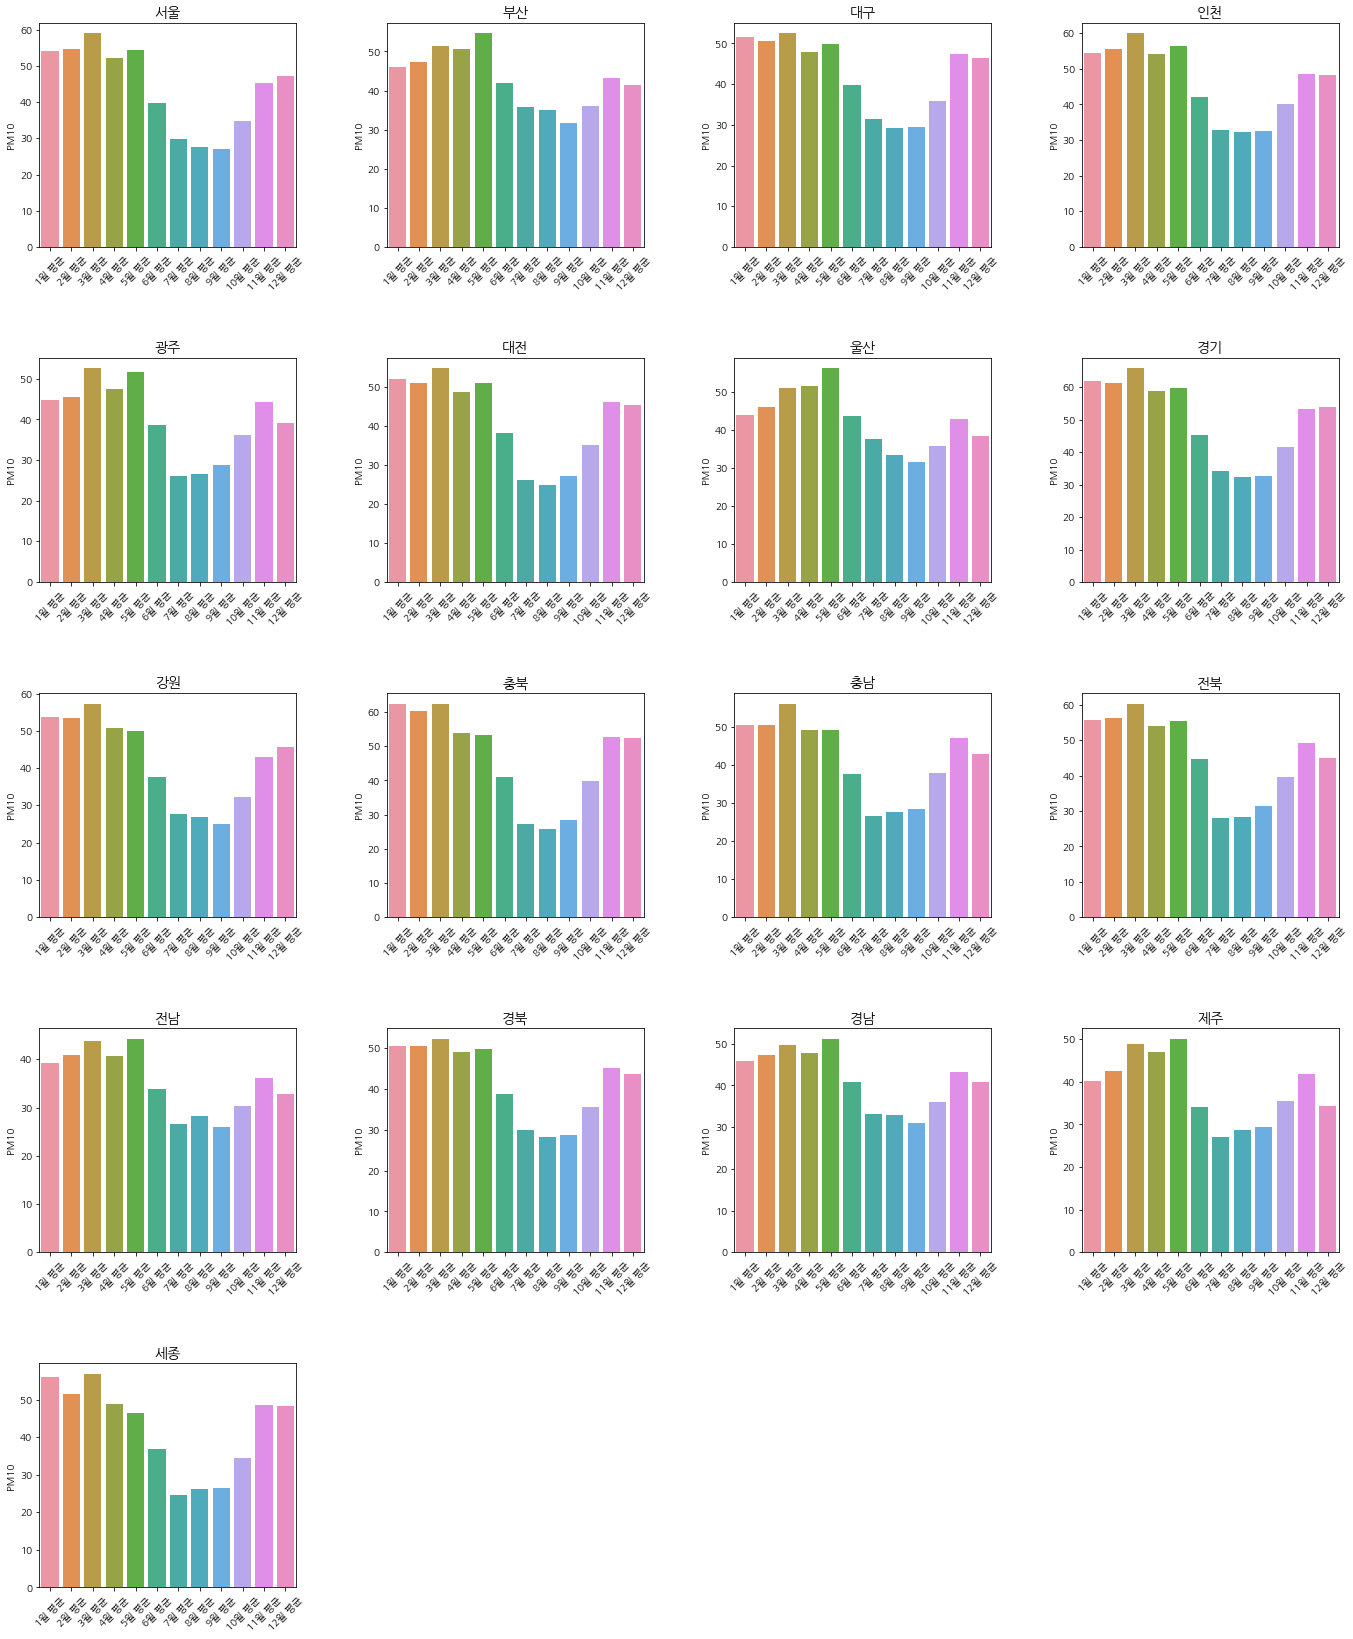

In [32]:
# 그래프 그리기
fig = plt.figure(figsize = (20, 28)) # 그래프 사이즈 설정

ax1 = fig.add_subplot(6, 4, 1)
ax2 = fig.add_subplot(6, 4, 2)
ax3 = fig.add_subplot(6, 4, 3)
ax4 = fig.add_subplot(6, 4, 4)
ax5 = fig.add_subplot(6, 4, 5)
ax6 = fig.add_subplot(6, 4, 6)
ax7 = fig.add_subplot(6, 4, 7)
ax8 = fig.add_subplot(6, 4, 8)
ax9 = fig.add_subplot(6, 4, 9)
ax10 = fig.add_subplot(6, 4, 10)
ax11 = fig.add_subplot(6, 4, 11)
ax12 = fig.add_subplot(6, 4, 12)
ax13 = fig.add_subplot(6, 4, 13)
ax14 = fig.add_subplot(6, 4, 14)
ax15 = fig.add_subplot(6, 4, 15)
ax16 = fig.add_subplot(6, 4, 16)
ax17 = fig.add_subplot(6, 4, 17)

# subplot의 x축 라벨 회전
labels = avgPM10_df.index
ax1.set_xticklabels(labels, rotation = 45)
ax2.set_xticklabels(labels, rotation = 45)
ax3.set_xticklabels(labels, rotation = 45)
ax4.set_xticklabels(labels, rotation = 45)
ax5.set_xticklabels(labels, rotation = 45)
ax6.set_xticklabels(labels, rotation = 45)
ax7.set_xticklabels(labels, rotation = 45)
ax8.set_xticklabels(labels, rotation = 45)
ax9.set_xticklabels(labels, rotation = 45)
ax10.set_xticklabels(labels, rotation = 45)
ax11.set_xticklabels(labels, rotation = 45)
ax12.set_xticklabels(labels, rotation = 45)
ax13.set_xticklabels(labels, rotation = 45)
ax14.set_xticklabels(labels, rotation = 45)
ax15.set_xticklabels(labels, rotation = 45)
ax16.set_xticklabels(labels, rotation = 45)
ax17.set_xticklabels(labels, rotation = 45)

sns.barplot(x = avgPM10_df.index, y = avgPM10_df['서울'], ax = ax1)
sns.barplot(x = avgPM10_df.index, y = avgPM10_df['부산'], ax = ax2)
sns.barplot(x = avgPM10_df.index, y = avgPM10_df['대구'], ax = ax3)
sns.barplot(x = avgPM10_df.index, y = avgPM10_df['인천'], ax = ax4)
sns.barplot(x = avgPM10_df.index, y = avgPM10_df['광주'], ax = ax5)
sns.barplot(x = avgPM10_df.index, y = avgPM10_df['대전'], ax = ax6)
sns.barplot(x = avgPM10_df.index, y = avgPM10_df['울산'], ax = ax7)
sns.barplot(x = avgPM10_df.index, y = avgPM10_df['경기'], ax = ax8)
sns.barplot(x = avgPM10_df.index, y = avgPM10_df['강원'], ax = ax9)
sns.barplot(x = avgPM10_df.index, y = avgPM10_df['충북'], ax = ax10)
sns.barplot(x = avgPM10_df.index, y = avgPM10_df['충남'], ax = ax11)
sns.barplot(x = avgPM10_df.index, y = avgPM10_df['전북'], ax = ax12)
sns.barplot(x = avgPM10_df.index, y = avgPM10_df['전남'], ax = ax13)
sns.barplot(x = avgPM10_df.index, y = avgPM10_df['경북'], ax = ax14)
sns.barplot(x = avgPM10_df.index, y = avgPM10_df['경남'], ax = ax15)
sns.barplot(x = avgPM10_df.index, y = avgPM10_df['제주'], ax = ax16)
sns.barplot(x = avgPM10_df.index, y = avgPM10_df['세종'], ax = ax17)

ax1.set_ylabel('PM10')
ax2.set_ylabel('PM10')
ax3.set_ylabel('PM10')
ax4.set_ylabel('PM10')
ax5.set_ylabel('PM10')
ax6.set_ylabel('PM10')
ax7.set_ylabel('PM10')
ax8.set_ylabel('PM10')
ax9.set_ylabel('PM10')
ax10.set_ylabel('PM10')
ax11.set_ylabel('PM10')
ax12.set_ylabel('PM10')
ax13.set_ylabel('PM10')
ax14.set_ylabel('PM10')
ax15.set_ylabel('PM10')
ax16.set_ylabel('PM10')
ax17.set_ylabel('PM10')

ax1.set_title('서울', fontsize = 14)
ax2.set_title('부산', fontsize = 14)
ax3.set_title('대구', fontsize = 14)
ax4.set_title('인천', fontsize = 14)
ax5.set_title('광주', fontsize = 14)
ax6.set_title('대전', fontsize = 14)
ax7.set_title('울산', fontsize = 14)
ax8.set_title('경기', fontsize = 14)
ax9.set_title('강원', fontsize = 14)
ax10.set_title('충북', fontsize = 14)
ax11.set_title('충남', fontsize = 14)
ax12.set_title('전북', fontsize = 14)
ax13.set_title('전남', fontsize = 14)
ax14.set_title('경북', fontsize = 14)
ax15.set_title('경남', fontsize = 14)
ax16.set_title('제주', fontsize = 14)
ax17.set_title('세종', fontsize = 14)

fig.tight_layout(pad = 5) # 플롯간 여백 조정
plt.show()

---

---
#**공공데이터 날씨 API 사용**

####**1. 패키지 설치 및 로드**

In [33]:
### 공공데이터 날씨 API 사용
import pandas as pd
import requests
import json

**[서비스 키 등록 & 날씨 측정 지점 관련 csv 불러오기]**

*   API 서비스키 발급 링크 : https://www.data.go.kr/data/15059093/openapi.do
*   날씨 측정 지점 관련 csv파일(stnIdsCode.csv)은 위 링크의 참고 문서 11p ~ 13p를 참고하여 생성함



In [34]:
# 날씨 측정 지점코드, 지점명, 관리관서가 담긴 데이터 프레임
# 경기, 강원, 충북, 충남, 전북, 전남, 경북, 경남 (도)는 더 세분화 되어있음 | 광역 자치 단체(시 도), 기초 자치 단체(시 군 구)

stnIds_df = pd.read_csv('/content/drive/MyDrive/PM10_Analysis_Project/Dataset/stnIdsCode.csv', encoding='cp949') # 날씨 측정 지점코드, 
                                                                                                                 # 지점명, 
                                                                                                                 # 관리관서가 담긴 csv파일
weather_df = pd.DataFrame() # 날씨 데이터 프레임
serviceKey = '일반 인증키 적는 곳(보안상의 이유로 따로 txt파일을 생성해서 불러옴)' # 일반 인증키

with open('/content/drive/MyDrive/PM10_Analysis_Project/Dataset/serviceKey.txt', 'r') as f:
  serviceKey = f.readline()

stnIds_df

,지점,지점명,관리관서
0,90,속초,강원지방기상청
1,93,북춘천,춘천기상대
2,95,철원,강원지방기상청
3,98,동두천,수도권기상청
4,99,파주,수도권기상청
...,...,...,...
90,285,합천,울산기상대
91,288,밀양,울산기상대
92,289,산청,창원기상대
93,294,거제,부산지방기상청


---

####**2. 날씨 API 사용하여 데이터셋 불러오기**

**[API 호출 함수 선언]**

*   stnNm : 지점명(종관기상관측 지점명)
*   tm : 일시
*   sumRn : 일강수량(mm)
*   avgWs : 평균 풍속(m/s)
*   maxWd : 최다 풍향(16방위)

In [35]:
# 날씨 API 호출 함수
def runWeatherAPI(area_df):
  rtn_df = pd.DataFrame() # 날씨 API 호출시 반환될 데이터 프레임
  
  for area in area_df['area']: 
    if (len(stnIds_df.loc[stnIds_df['지점명'] == area, '지점'])):
      for pageNo in range(1, 10):
        url = 'http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList'
        url += '?serviceKey=' + serviceKey
        url += '&pageNo=' + str(pageNo)
        url += '&numOfRows=900' # 1000미만 가능
        url += '&dataType=JSON'
        url += '&dataCd=ASOS'
        url += '&dateCd=DAY'
        url += '&startDt=20100101'
        url += '&endDt=20201231'
        url += '&stnIds=' + str(int(stnIds_df.loc[stnIds_df['지점명'] == area, '지점'])) # int64 -> int 변환후 str로 변환해야함
        response = requests.get(url)
        jsonData = json.loads(response.text)
        
        print(f'지점명 : {area}({pageNo})')
        print(f'resultMsg : {jsonData["response"]["header"]["resultMsg"]}')
        if(jsonData['response']['header']['resultMsg'] == 'NO_DATA'): break # 'NO_DATA' : 더이상 데이터가 없는 경우, 'NORMAL_SERVICE' : 정상작동

        json_df = pd.json_normalize(jsonData['response']['body']['items']['item'])
        rtn_df = pd.concat([rtn_df, json_df[['stnNm', 'tm', 'sumRn', 'avgWs', 'maxWd']]], join = 'outer', ignore_index = True)

  return rtn_df

**[API 함수 호출 시 쓰일 인수(지역 데이터 프레임) 생성]**

In [36]:
# merge를 이용하여 미세먼지 데이터 프레임의 지역(컬럼명 : 구분2) 고유값이 담긴 데이터 프레임 생성
area_df = pd.DataFrame()
area_df['area'] = np.nan

for year in df_dic.keys():
  area_df2 = pd.DataFrame()
  area_df2['area'] = df_dic[year].loc[df_dic[year]['구분1'] == '도시대기', '구분2'].unique()
  area_df = pd.merge(area_df, area_df2, how = 'outer', on = 'area')

area_df

,area
0,서울
1,부산
2,대구
3,인천
4,광주
5,대전
6,울산
7,경기
8,강원
9,충북


**[API 함수 호출]**

*   resultMsg : NO_DATA -> 데이터 없음
*   resultMsg : NORMAL_SERVICE -> 정상 작동
*   resultMsg : SERVICETIME_OUT -> 서비스 연결 실패
*   resultMsg : APPLICATION_ERROR -> 어플리케이션 에러
*   이 외 참고문서 15p 참고



In [37]:
# 날씨 API 호출
weather_df = runWeatherAPI(area_df) # 위에서 생성한 area_df를 인자로 사용

지점명 : 서울(1)
resultMsg : NORMAL_SERVICE
지점명 : 서울(2)
resultMsg : NORMAL_SERVICE
지점명 : 서울(3)
resultMsg : NORMAL_SERVICE
지점명 : 서울(4)
resultMsg : NORMAL_SERVICE
지점명 : 서울(5)
resultMsg : NORMAL_SERVICE
지점명 : 서울(6)
resultMsg : NO_DATA
지점명 : 부산(1)
resultMsg : NORMAL_SERVICE
지점명 : 부산(2)
resultMsg : NORMAL_SERVICE
지점명 : 부산(3)
resultMsg : NORMAL_SERVICE
지점명 : 부산(4)
resultMsg : NORMAL_SERVICE
지점명 : 부산(5)
resultMsg : NORMAL_SERVICE
지점명 : 부산(6)
resultMsg : NO_DATA
지점명 : 대구(1)
resultMsg : NORMAL_SERVICE
지점명 : 대구(2)
resultMsg : NORMAL_SERVICE
지점명 : 대구(3)
resultMsg : NORMAL_SERVICE
지점명 : 대구(4)
resultMsg : NORMAL_SERVICE
지점명 : 대구(5)
resultMsg : NORMAL_SERVICE
지점명 : 대구(6)
resultMsg : NO_DATA
지점명 : 인천(1)
resultMsg : NORMAL_SERVICE
지점명 : 인천(2)
resultMsg : NORMAL_SERVICE
지점명 : 인천(3)
resultMsg : NORMAL_SERVICE
지점명 : 인천(4)
resultMsg : NORMAL_SERVICE
지점명 : 인천(5)
resultMsg : NORMAL_SERVICE
지점명 : 인천(6)
resultMsg : NO_DATA
지점명 : 광주(1)
resultMsg : NORMAL_SERVICE
지점명 : 광주(2)
resultMsg : NORMAL_SERVICE
지점명 : 광주(3)
re

---

####**3. 불러온 데이터셋 살펴보기**

In [38]:
# 불러온 데이터 프레임의 요약 정보
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37373 entries, 0 to 37372
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   stnNm   37373 non-null  object
 1   tm      37373 non-null  object
 2   sumRn   37373 non-null  object
 3   avgWs   37373 non-null  object
 4   maxWd   37373 non-null  object
dtypes: object(5)
memory usage: 1.4+ MB


---

####**4. 불러온 데이터셋 가공하기**

**[데이터셋 컬럼명 변경]**

In [39]:
# 날씨 데이터 프레임 컬럼명 변경
weather_df.rename(columns = {'stnNm' : '지점명', 'tm' : '일시', 'sumRn' : '일강수량(mm)', \
                             'avgWs' : '평균풍속(m/s)', 'maxWd' : '최다풍향(16방위)'}, inplace = True)

weather_df

,지점명,일시,일강수량(mm),평균풍속(m/s),최다풍향(16방위)
0,서울,2010-01-01,,1.9,70
1,서울,2010-01-02,1.4,2.8,70
2,서울,2010-01-03,,2.2,290
3,서울,2010-01-04,14.2,3.0,70
4,서울,2010-01-05,0.0,2.9,290
...,...,...,...,...,...
37368,세종,2020-12-27,,0.4,90
37369,세종,2020-12-28,,0.7,70
37370,세종,2020-12-29,1.8,1.6,320
37371,세종,2020-12-30,0.4,3.3,320


**[년, 월, 일 컬럼 생성]**

In [40]:
def addYear(date):
  # year = date[:4]
  year = date.split('-')[0]
  return year

def addMonth(date):
  # month = date[5:7]
  month = date.split('-')[1]
  return month

def addDay(date):
  day = date.split('-')[2]
  return day

In [41]:
# 일시 -> 년, 월, 일 열로 분리

weather_df['년'] = weather_df.apply(lambda x: addYear(x['일시']), axis = 1)
weather_df['월'] = weather_df.apply(lambda x: addMonth(x['일시']), axis = 1)
weather_df['일'] = weather_df.apply(lambda x: addDay(x['일시']), axis = 1)
weather_df['월'] = weather_df['월'].astype(int) # 01월~09월 경우 앞에 0 없애기 위한 int형변환
weather_df['일'] = weather_df['일'].astype(int) # 01일~09일 경우 앞에 0 없애기 위한 int형변환 

weather_df.drop(['일시'], axis = 1, inplace = True)

weather_df

,지점명,일강수량(mm),평균풍속(m/s),최다풍향(16방위),년,월,일
0,서울,,1.9,70,2010,1,1
1,서울,1.4,2.8,70,2010,1,2
2,서울,,2.2,290,2010,1,3
3,서울,14.2,3.0,70,2010,1,4
4,서울,0.0,2.9,290,2010,1,5
...,...,...,...,...,...,...,...
37368,세종,,0.4,90,2020,12,27
37369,세종,,0.7,70,2020,12,28
37370,세종,1.8,1.6,320,2020,12,29
37371,세종,0.4,3.3,320,2020,12,30


---

####**5. csv파일로 저장하기**

In [42]:
# 날씨 데이터 프레임 csv파일로 저장
weather_df.to_csv('/content/drive/MyDrive/PM10_Analysis_Project/Dataset/weather.csv')

---

---
#**일별 날씨 데이터 가공**

####**1. 일별 날씨 데이터셋 불러오기**

In [43]:
# 날씨 csv 파일 불러오기
weather_df = pd.read_csv('/content/drive/MyDrive/PM10_Analysis_Project/Dataset/weather.csv', index_col = 0)

---

####**2. 일별 날씨 데이터셋 살펴보기**

In [44]:
# 일별 날씨 데이터 프레임의 요약 정보
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37373 entries, 0 to 37372
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지점명         37373 non-null  object 
 1   일강수량(mm)    14051 non-null  float64
 2   평균풍속(m/s)   37349 non-null  float64
 3   최다풍향(16방위)  37263 non-null  float64
 4   년           37373 non-null  int64  
 5   월           37373 non-null  int64  
 6   일           37373 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 2.3+ MB


In [45]:
# 불러온 데이터 지점명 확인(고유값)
weather_df['지점명'].unique()

# 경기, 강원, 충북, 충남, 전북, 전남, 경북, 경남 (도)는 더 세분화 되어있음 | 광역 자치 단체(시 도), 기초 자치 단체(시 군 구)

array(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '제주', '세종'], dtype=object)

---

####**3. 일별 날씨 데이터셋 가공하기**

**[데이터셋 전처리]**

In [46]:
# 일강수량 결측치 채우기
weather_df['일강수량(mm)'].fillna(0, inplace = True)

# 풍속과 풍향 결측치 제거
weather_df.dropna(subset = ['평균풍속(m/s)', '최다풍향(16방위)'], inplace = True)

In [47]:
# 년, 월, 일 열의 타입을 문자열 타입으로 변경
weather_df['년'] = weather_df['년'].astype(str)
weather_df['월'] = weather_df['월'].astype(str)
weather_df['일'] = weather_df['일'].astype(str)

# 최다풍향(16방위) 열의 타입을 int형으로 변경
weather_df['최다풍향(16방위)'] = weather_df['최다풍향(16방위)'].astype(int)

In [48]:
# 데이터셋 전처리 후 확인하기
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37255 entries, 0 to 37372
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지점명         37255 non-null  object 
 1   일강수량(mm)    37255 non-null  float64
 2   평균풍속(m/s)   37255 non-null  float64
 3   최다풍향(16방위)  37255 non-null  int64  
 4   년           37255 non-null  object 
 5   월           37255 non-null  object 
 6   일           37255 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 2.3+ MB


---

####**4. 데이터셋 부족한 지점 삭제하기**

In [49]:
# 각 지점별 년, 월 데이터 고유값 확인
grouped = weather_df.groupby(['지점명', '년'])
for key, value in grouped:
  print(f'지점명 : {key[0]}({key[1]}년도)')
  print(value['월'].unique())
  print()

지점명 : 광주(2010년도)
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']

지점명 : 광주(2011년도)
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']

지점명 : 광주(2012년도)
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']

지점명 : 광주(2013년도)
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']

지점명 : 광주(2014년도)
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']

지점명 : 광주(2015년도)
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']

지점명 : 광주(2016년도)
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']

지점명 : 광주(2017년도)
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']

지점명 : 광주(2018년도)
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']

지점명 : 광주(2019년도)
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']

지점명 : 광주(2020년도)
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']

지점명 : 대구(2010년도)
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']

지점명 : 대구(2011년도)
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']

지점명 : 대구(2012년도)
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12']

지점명 : 

In [50]:
# 세종시는 2019년와 2020년 날씨 데이터만 가져와진 것을 확인할 수 있음
# 세종시 날씨 데이터 제거
weather_df.drop(weather_df[weather_df['지점명'] == '세종'].index, inplace = True)

weather_df['지점명'].unique() # 제거 확인

array(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '제주'], dtype=object)

---

####**5. 일별 날씨 데이터셋 통계정보 확인하기**

In [51]:
# 날씨 데이터 프레임의 일강수량, 평균풍속, 최다풍향 통계정보
weather_df[['일강수량(mm)', '평균풍속(m/s)', '최다풍향(16방위)']].describe()

,일강수량(mm),평균풍속(m/s),최다풍향(16방위)
count,32035.000000,32035.000000,32035.000000
mean,3.663802,2.442547,197.497737
std,13.737864,1.181149,111.719467
min,0.000000,0.100000,20.000000
25%,0.000000,1.600000,90.000000
50%,0.000000,2.200000,230.000000
75%,0.500000,3.000000,290.000000
max,310.000000,11.600000,360.000000


---

---
# **월별 날씨 데이터로 가공**

####**1. 월별 날씨 데이터셋 생성하기**

**[데이터 프레임 생성]**

In [52]:
# 날씨 데이터 지점별 월평균 데이터 및 월 합 데이터로 가공
my_df = pd.DataFrame(columns = ['지점명', '년', '월', '월합강수량(mm)', '평균풍속(m/s)', '최다풍향(16방위)'])

for area in weather_df['지점명'].unique():
  for year in weather_df['년'].unique():
    for month in weather_df['월'].unique():
      df = weather_df[(weather_df['지점명'] == area) & (weather_df['년'] == year) & (weather_df['월'] == month)]
      dic = {'지점명':area, 
             '년':year, 
             '월':month, 
             '월합강수량(mm)':round(df['일강수량(mm)'].sum(), 2), 
             '평균풍속(m/s)':round(df['평균풍속(m/s)'].mean(), 2), 
             '최다풍향(16방위)':df['최다풍향(16방위)'].value_counts().index[0]}
      my_df = my_df.append(dic, ignore_index = True)
      
my_df['최다풍향(16방위)'] = my_df['최다풍향(16방위)'].astype(int) # numpy.int64형태의 value가 object로 변화됨 이유모름.

my_df

,지점명,년,월,월합강수량(mm),평균풍속(m/s),최다풍향(16방위)
0,서울,2010,1,29.3,2.34,290
1,서울,2010,2,55.3,2.36,290
2,서울,2010,3,82.5,2.91,70
3,서울,2010,4,62.8,2.86,290
4,서울,2010,5,124.0,2.64,70
...,...,...,...,...,...,...
1051,제주,2020,8,140.4,2.88,20
1052,제주,2020,9,400.5,2.97,70
1053,제주,2020,10,53.7,2.86,20
1054,제주,2020,11,28.2,2.87,160


---

####**2. weather_df 변경하기**

In [53]:
weather_df = my_df # 일별 날씨 데이터 프레임을 월별 날씨 데이터 프레임으로 변경

weather_df

,지점명,년,월,월합강수량(mm),평균풍속(m/s),최다풍향(16방위)
0,서울,2010,1,29.3,2.34,290
1,서울,2010,2,55.3,2.36,290
2,서울,2010,3,82.5,2.91,70
3,서울,2010,4,62.8,2.86,290
4,서울,2010,5,124.0,2.64,70
...,...,...,...,...,...,...
1051,제주,2020,8,140.4,2.88,20
1052,제주,2020,9,400.5,2.97,70
1053,제주,2020,10,53.7,2.86,20
1054,제주,2020,11,28.2,2.87,160


---

####**3. 월별 날씨 데이터셋 살펴보기**

In [54]:
# 월별 날씨 데이터 프레임의 요약 정보
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지점명         1056 non-null   object 
 1   년           1056 non-null   object 
 2   월           1056 non-null   object 
 3   월합강수량(mm)   1056 non-null   float64
 4   평균풍속(m/s)   1056 non-null   float64
 5   최다풍향(16방위)  1056 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 49.6+ KB


---

####**4. 월별 날씨 데이터셋 통계정보 확인하기**

In [55]:
# 날씨 데이터 프레임의 월합강수량, 평균풍속, 최다풍향 통계정보
weather_df[['월합강수량(mm)', '평균풍속(m/s)', '최다풍향(16방위)']].describe()

,월합강수량(mm),평균풍속(m/s),최다풍향(16방위)
count,1056.000000,1056.000000,1056.000000
mean,111.145739,2.443788,199.592803
std,122.200416,0.717981,116.580525
min,0.000000,0.920000,20.000000
25%,33.500000,1.880000,70.000000
50%,73.050000,2.390000,230.000000
75%,144.125000,2.942500,320.000000
max,1131.000000,5.120000,360.000000


---

---
# **2020년 최다풍향 시각화**

####**1. 16방위 정보를 담는 리스트 선언**



*   16방위 -> 해당 방위에서 불어오는 바람 (ex: 270이면 서쪽에서 불어오는 바람 -> 서풍)
*   남동풍 : 남동쪽에서 불어오는 바람
*   남동쪽은 ↘, 그런데 남동풍은 ↖ 이렇게 표시

In [56]:
# 16방위 변수들
eng_16 = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
deg_16 = [0, 20, 50, 70, 90, 110, 140, 160, 180, 200, 230, 250, 270, 290, 320, 340]

---

####**2. 2020년 최다풍향 시각화**

**[데이터 프레임 생성]**

In [57]:
# 2020년 최다풍향 데이터 가공
my_sr = weather_df.loc[weather_df['년'] == '2020', '최다풍향(16방위)'].value_counts() # 고유값 개수 시리즈 저장
my_sr.rename(index = {360 : 0}, inplace = True) # 정렬을 위해 360도(북, N)를 0도로 변경
my_sr.sort_index(inplace = True) # eng_16에 맞게 정렬
my_df = pd.DataFrame(my_sr, index = deg_16, columns = ['최다풍향(16방위)'])

my_df

,최다풍향(16방위)
0,2.0
20,10.0
50,14.0
70,2.0
90,NaN
110,2.0
140,7.0
160,1.0
180,2.0
200,7.0


**[데이터 시각화]**

*   참고 : https://matplotlib.org/2.1.0/gallery/pie_and_polar_charts/polar_bar.html
*   참고 : https://www.pythonpool.com/matplotlib-polar-plot/
*   참고 : https://blog.naver.com/bamyam19/222405715959



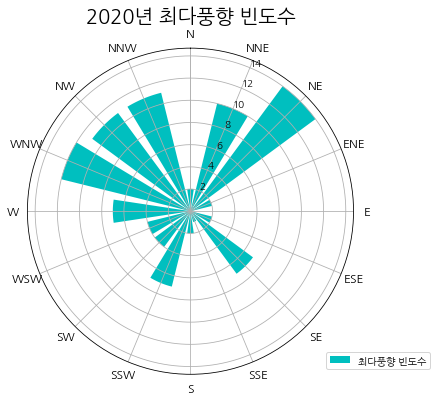

In [58]:
# 그래프 그리기
# 16방위 축(x축 간격)
label_loc = np.linspace(start = 0, stop = 2*np.pi, num = len(eng_16) + 1)

# x값 간격
theta = np.linspace(start = 0, stop = 2*np.pi, num = len(eng_16), endpoint = False)

plt.figure(figsize= (6, 6))
ax = plt.subplot(polar=True)
ax.set_theta_zero_location("N") # 세타의 0도 시작은 "N"인 북으로 설정
ax.set_theta_direction(-1) # 세타 방향을 반대로(반시계 -> 시계)

plt.xticks(label_loc, labels=eng_16, fontsize = 12)
plt.bar(x = theta, height = my_df['최다풍향(16방위)'], width = 0.3, color = 'c', label = '최다풍향 빈도수')

plt.legend(loc = 'lower left', bbox_to_anchor=(0.9, 0.0))
plt.title('2020년 최다풍향 빈도수',size = 20, pad = 10)
plt.show()

---

####**3. 2020년 계절별 최다풍향 시각화**

**[데이터 프레임 생성]**

In [59]:
# 2020년 계절별 최다풍향 데이터 가공
my_df = pd.DataFrame(index = deg_16) # 2020년 계절별 최다풍향 고유값 개수를 저장할 데이터 프레임
df = weather_df.loc[weather_df['년'] == '2020', ['월', '최다풍향(16방위)']]

# 사계절별 고유값 개수
my_df['봄'] = df.loc[(df['월'] == '3') | (df['월'] == '4') | (df['월'] == '5'), '최다풍향(16방위)'].value_counts()
my_df['여름'] = df.loc[(df['월'] == '6') | (df['월'] == '7') | (df['월'] == '8'), '최다풍향(16방위)'].value_counts()
my_df['가을'] = df.loc[(df['월'] == '9') | (df['월'] == '10') | (df['월'] == '11'), '최다풍향(16방위)'].value_counts()
my_df['겨울'] = df.loc[(df['월'] == '12') | (df['월'] == '1') | (df['월'] == '2'), '최다풍향(16방위)'].value_counts()
my_df.rename(index = {360 : 0}, inplace = True) # 정렬을 위한 360도(북, N)를 0도로 변경
my_df.sort_index(inplace = True) # eng_16에 맞게 정렬

my_df.fillna(0, inplace = True) # 결측치 표준화(??)
# 결측치가 존재했을 경우(float)가 있으므로 int로 형변환 해줌
my_df['봄'] = my_df['봄'].astype(int)
my_df['여름'] = my_df['여름'].astype(int)
my_df['가을'] = my_df['가을'].astype(int)
my_df['겨울'] = my_df['겨울'].astype(int)

my_df

,봄,여름,가을,겨울
0,0,0,0,0
20,1,2,3,4
50,2,3,5,4
70,1,0,1,0
90,0,0,0,0
110,1,1,0,0
140,1,4,2,0
160,0,0,1,0
180,1,1,0,0
200,0,7,0,0


**[데이터 시각화]**

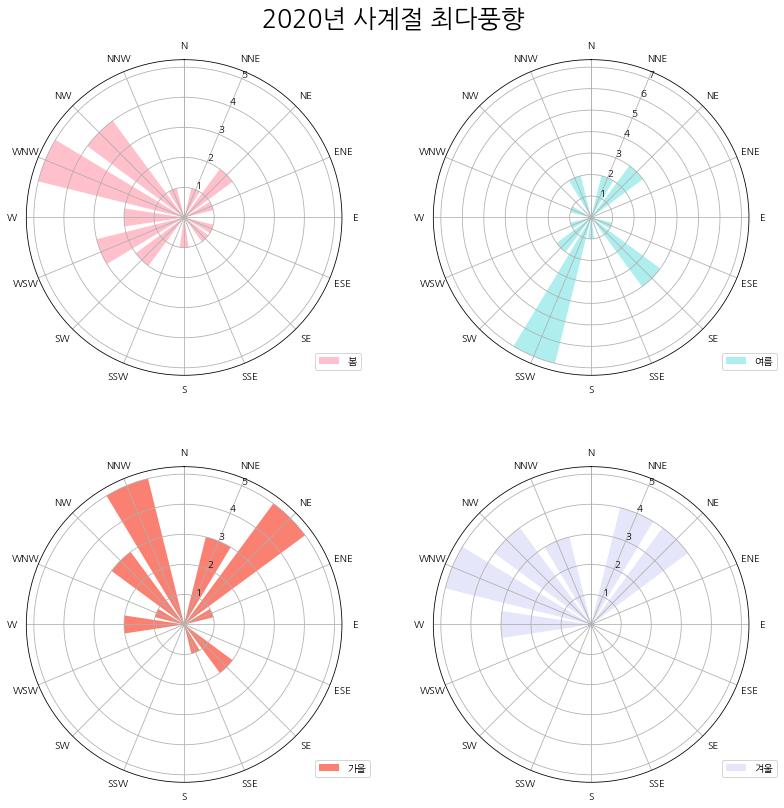

In [60]:
# 그래프 그리기
fig = plt.figure(figsize = (12, 12))

ax1 = fig.add_subplot(2, 2, 1, polar=True)
ax2 = fig.add_subplot(2, 2, 2, polar=True)
ax3 = fig.add_subplot(2, 2, 3, polar=True)
ax4 = fig.add_subplot(2, 2, 4, polar=True)

ax1.set_theta_zero_location("N") # 세타의 0도 시작은 "N"인 북으로 설정
ax1.set_theta_direction(-1) # 세타 방향을 반대로(반시계 -> 시계)
ax2.set_theta_zero_location("N")
ax2.set_theta_direction(-1) 
ax3.set_theta_zero_location("N") 
ax3.set_theta_direction(-1) 
ax4.set_theta_zero_location("N") 
ax4.set_theta_direction(-1) 

label_loc = np.linspace(start = 0, stop = 2*np.pi, num = len(eng_16) + 1)
theta = np.linspace(0, 2*np.pi, len(eng_16), endpoint = False)

ax1.set_xticks(label_loc)
ax1.set_xticklabels(eng_16)
ax2.set_xticks(label_loc)
ax2.set_xticklabels(eng_16)
ax3.set_xticks(label_loc)
ax3.set_xticklabels(eng_16)
ax4.set_xticks(label_loc)
ax4.set_xticklabels(eng_16)

ax1.bar(theta, my_df['봄'], width = 0.3, color = 'pink', label = '봄')
ax2.bar(theta, my_df['여름'], width = 0.3, color = 'paleturquoise', label = '여름')
ax3.bar(theta, my_df['가을'], width = 0.3, color = 'salmon', label = '가을')
ax4.bar(theta, my_df['겨울'], width = 0.3, color = 'lavender', label = '겨울')

ax1.legend(loc = 'lower left', bbox_to_anchor=(0.9, 0.0))
ax2.legend(loc = 'lower left', bbox_to_anchor=(0.9, 0.0))
ax3.legend(loc = 'lower left', bbox_to_anchor=(0.9, 0.0))
ax4.legend(loc = 'lower left', bbox_to_anchor=(0.9, 0.0))

fig.suptitle("2020년 사계절 최다풍향", fontsize = 25) # figure 제목 설정
fig.tight_layout(pad = 5) # 플롯간 여백 조정

plt.show()

---

----
# **날씨 데이터 프레임에 "PM10" 열 추가하기**

####**1. 미세먼지 데이터와 날씨 데이터 이용해서 추가하기**

**[데이터 프레임을 생성하는 방법]**

In [61]:
# 날씨 데이터 프레임에 PM10열 추가하기

# 다른 데이터 프레임을 생성하는 방법
for year in df_dic.keys():
  my_df = df_dic[year][df_dic[year]['구분1'] == '도시대기']
  for month in my_df.columns[4:]:
    for area in my_df['구분2'].unique():    
      weather_df.loc[(weather_df['년'] == year[:-1]) &
                     (weather_df['월'] == month[:-1]) &
                     (weather_df['지점명'] == area), 'PM10'] = my_df.loc[my_df['구분2'] == area, month].sum() / \
                                                                my_df.loc[my_df['구분2'] == area, month].count()

weather_df

,지점명,년,월,월합강수량(mm),평균풍속(m/s),최다풍향(16방위),PM10
0,서울,2010,1,29.3,2.34,290,58.960000
1,서울,2010,2,55.3,2.36,290,49.680000
2,서울,2010,3,82.5,2.91,70,60.840000
3,서울,2010,4,62.8,2.86,290,49.000000
4,서울,2010,5,124.0,2.64,70,55.720000
...,...,...,...,...,...,...,...
1051,제주,2020,8,140.4,2.88,20,29.000000
1052,제주,2020,9,400.5,2.97,70,26.000000
1053,제주,2020,10,53.7,2.86,20,31.000000
1054,제주,2020,11,28.2,2.87,160,28.500000


**[그룹화를 이용한 방법]**

In [62]:
# 날씨 데이터 프레임에 PM10열 추가하기

# 그룹화를 이용한 방법
for year in df_dic.keys():
  grouped = df_dic[year].groupby(['구분1']) 
  for month in df_dic[year].columns[4:]:
    for area in grouped.get_group('도시대기')['구분2'].unique():    
      weather_df.loc[(weather_df['년'] == year[:-1]) & 
                     (weather_df['월'] == month[:-1]) & 
                     (weather_df['지점명'] == area), 'PM10'] = grouped.get_group('도시대기') \
                                                                .loc[grouped.get_group('도시대기')['구분2'] == area, month].sum() / \
                                                                grouped.get_group('도시대기') \
                                                                 .loc[grouped.get_group('도시대기')['구분2'] == area, month].count()

weather_df                                                              

,지점명,년,월,월합강수량(mm),평균풍속(m/s),최다풍향(16방위),PM10
0,서울,2010,1,29.3,2.34,290,58.960000
1,서울,2010,2,55.3,2.36,290,49.680000
2,서울,2010,3,82.5,2.91,70,60.840000
3,서울,2010,4,62.8,2.86,290,49.000000
4,서울,2010,5,124.0,2.64,70,55.720000
...,...,...,...,...,...,...,...
1051,제주,2020,8,140.4,2.88,20,29.000000
1052,제주,2020,9,400.5,2.97,70,26.000000
1053,제주,2020,10,53.7,2.86,20,31.000000
1054,제주,2020,11,28.2,2.87,160,28.500000


---

####**2. 날씨 데이터셋 살펴보기**

In [63]:
# 날씨 데이터 프레임 요약 정보
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지점명         1056 non-null   object 
 1   년           1056 non-null   object 
 2   월           1056 non-null   object 
 3   월합강수량(mm)   1056 non-null   float64
 4   평균풍속(m/s)   1056 non-null   float64
 5   최다풍향(16방위)  1056 non-null   int64  
 6   PM10        1056 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 57.9+ KB


In [64]:
# 날씨 데이터 확인
weather_df

,지점명,년,월,월합강수량(mm),평균풍속(m/s),최다풍향(16방위),PM10
0,서울,2010,1,29.3,2.34,290,58.960000
1,서울,2010,2,55.3,2.36,290,49.680000
2,서울,2010,3,82.5,2.91,70,60.840000
3,서울,2010,4,62.8,2.86,290,49.000000
4,서울,2010,5,124.0,2.64,70,55.720000
...,...,...,...,...,...,...,...
1051,제주,2020,8,140.4,2.88,20,29.000000
1052,제주,2020,9,400.5,2.97,70,26.000000
1053,제주,2020,10,53.7,2.86,20,31.000000
1054,제주,2020,11,28.2,2.87,160,28.500000


---

---
# **미세먼지와 날씨의 상관계수**





####**1. 히트맵 그리기**



*   0 ~ 1 정상관(Positive Correlation)
*   -1 ~ 0 부상관(Negative Correlation)



**[데이터 시각화]**

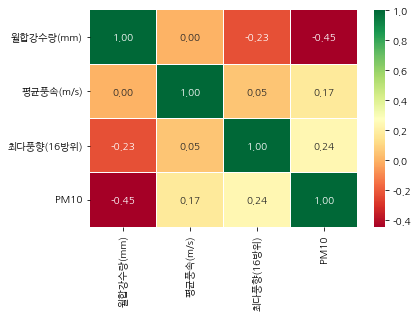

In [65]:
# 날씨 데이터와 미세먼지 히트맵
sns.heatmap(weather_df[['월합강수량(mm)', '평균풍속(m/s)', '최다풍향(16방위)', 'PM10']].corr(),
            linewidths = 0.1, cmap = 'RdYlGn', linecolor = 'white', annot = True, fmt = '.2f')
plt.show()

---

####**2. 히트맵 분석**

**[히트맵 분석]**



*   월합강수량은 높을 수록 PM10이 줄어드는 관계 ***(부상관)***
*   최다풍향은 360(북) - 90(동) - 180(남) - 270(서) 이므로 
<br>양수로 나온 결과로 서쪽에서 바람이 불때(남, 남서, 북서, 북)가 
<br>동쪽(북, 북동, 남동, 남)에서보다 상관이 더 높다 ***(정상관)***
*   평균풍속도 높을 수록 미세먼지와 관련이 높다는 걸 확인할 수 있음 ***(정상관)***
*   즉 중국쪽에서 불어오는 미세먼지의 영향이 있다고 볼 수 있음


---

---
# **미세먼지와 날씨 시각화**

####**1. 풍향별 미세먼지 농도**

**[데이터 프레임 생성]**

In [66]:
# 풍향별 미세먼지 농도
grouped = weather_df.groupby('최다풍향(16방위)')

my_df = pd.DataFrame(index = deg_16)

for deg in deg_16:
  if deg == 0: 
    my_df.loc[deg, 'PM10'] = grouped.get_group(360)['PM10'].mean() # 0도는 360도와 같다(N : 북)
  else:
    my_df.loc[deg, 'PM10'] = grouped.get_group(deg)['PM10'].mean()

my_df  

,PM10
0,43.202249
20,42.300522
50,37.485769
70,36.631173
90,42.537722
110,35.345617
140,36.997184
160,40.484722
180,40.326541
200,41.519258


**[데이터 시각화]**

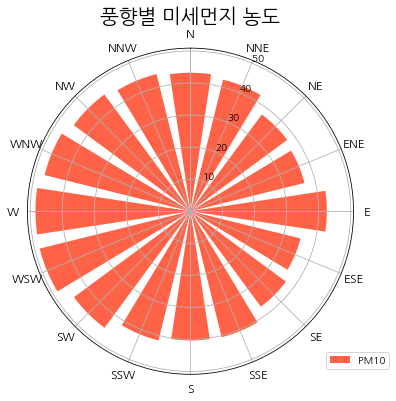

In [67]:
# 그래프 그리기
# 16방위 축(x축 간격)
label_loc = np.linspace(start = 0, stop = 2*np.pi, num = len(eng_16) + 1)

# x값 간격
theta = np.linspace(start = 0, stop = 2*np.pi, num = len(eng_16), endpoint = False)

plt.figure(figsize= (6, 6))
ax = plt.subplot(polar=True)
ax.set_theta_zero_location("N") # 세타의 0도 시작은 "N"인 북으로 설정
ax.set_theta_direction(-1) # 세타 방향을 반대로(반시계 -> 시계)

plt.xticks(label_loc, labels=eng_16, fontsize = 12)
bar = plt.bar(x = theta, height = my_df['PM10'], width = 0.3, color = 'tomato', label = 'PM10')

plt.legend(loc = 'lower left', bbox_to_anchor=(0.9, 0.0))
plt.title('풍향별 미세먼지 농도',size = 20, pad = 10)

plt.show()

---